           State/UT     2014     2015     2016     2017     2018     2019   
0   Jammu & Kashmir   6130.0   6306.0   6464.0   6645.0   6824.0   6844.0  \
1            Ladakh      NaN      NaN      NaN      NaN      NaN    159.0   
2  Himachal Pradesh   4239.0   4347.0   4434.0   4534.0   4642.0   4744.0   
3            Punjab  19393.0  19858.0  20332.0  20784.0  21278.0  21763.0   
4        Chandigarh    470.0    487.0    501.0    517.0    532.0    548.0   

      2020     2021     2022     2023  Unnamed: 11  Unnamed: 12  
0   7027.0   7211.0   7396.0   7575.0          NaN          NaN  
1    162.0    166.0    171.0    175.0          NaN          NaN  
2   4856.0   4953.0   5058.0   5180.0          NaN          NaN  
3  22276.0  22786.0  23301.0  23865.0          NaN          NaN  
4    564.0    582.0    598.0    612.0          NaN          NaN  
Index(['State/UT', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', 'Unnamed: 11', 'Unnamed: 12'],
    

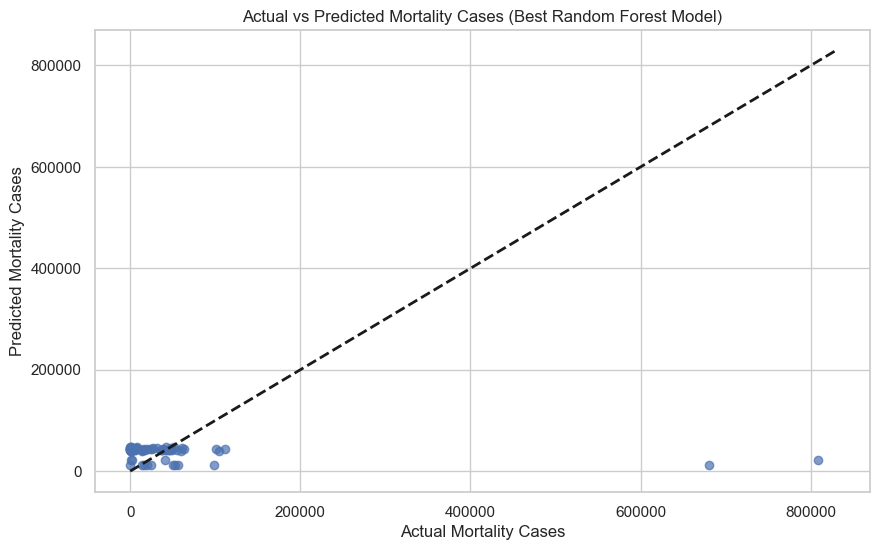

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Load the dataset
data = pd.read_csv('Estimated Mortality of Cancer Cases in India.csv')

# Display the first few rows of the dataset
print(data.head())

# Print the column names to understand the structure
print(data.columns)

# Strip whitespace from column names and convert to lowercase
data.columns = data.columns.str.strip().str.lower()

# Check the updated column names
print(data.columns)

# Drop any unnamed columns (usually extra columns)
data = data.loc[:, ~data.columns.str.contains('^unnamed')]

# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Melt the DataFrame to have a long format for easier plotting
# Adjust 'state/ut' to the correct column name if necessary
data_melted = data.melt(id_vars=['state/ut'], var_name='year', value_name='mortality_cases')

# Convert 'year' and 'mortality_cases' to numeric
data_melted['year'] = pd.to_numeric(data_melted['year'], errors='coerce')
data_melted['mortality_cases'] = pd.to_numeric(data_melted['mortality_cases'], errors='coerce')

# Drop rows with NaN values
data_melted.dropna(inplace=True)

# Define features and target variable
X = data_melted[['year']]  # Using 'year' as the feature
y = data_melted['mortality_cases']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train models and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.2f}")

# Hyperparameter tuning for Random Forest (optional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {grid_search.best_params_}")

# Evaluate the best model from grid search
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate performance of the best model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest Model - MSE: {mse_best_rf:.2f}, R²: {r2_best_rf:.2f}")

# Visualize predictions vs actual values for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Mortality Cases')
plt.ylabel('Predicted Mortality Cases')
plt.title('Actual vs Predicted Mortality Cases (Best Random Forest Model)')
plt.show()

In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Load the dataset
data = pd.read_csv('Estimated Mortality of Cancer Cases in India.csv')

# Melt the DataFrame to have a long format for easier plotting
data_melted = data.melt(id_vars=['state/ut'], var_name='year', value_name='mortality_cases')

# Convert 'year' and 'mortality_cases' to numeric
data_melted['year'] = pd.to_numeric(data_melted['year'], errors='coerce')
data_melted['mortality_cases'] = pd.to_numeric(data_melted['mortality_cases'], errors='coerce')

# Drop rows with NaN values
data_melted.dropna(inplace=True)

# Define features and target variable
X = data_melted[['year']]  # Using 'year' as the feature
y = data_melted['mortality_cases']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Model - MSE: {mse:.2f}, R²: {r2:.2f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Mortality Cases')
plt.ylabel('Predicted Mortality Cases')
plt.title('Actual vs Predicted Mortality Cases (XGBoost Model)')
plt.show()

KeyError: "The following 'id_vars' are not present in the DataFrame: ['state/ut']"

           State/UT     2014     2015     2016     2017     2018     2019   
0   Jammu & Kashmir   6130.0   6306.0   6464.0   6645.0   6824.0   6844.0  \
1            Ladakh      NaN      NaN      NaN      NaN      NaN    159.0   
2  Himachal Pradesh   4239.0   4347.0   4434.0   4534.0   4642.0   4744.0   
3            Punjab  19393.0  19858.0  20332.0  20784.0  21278.0  21763.0   
4        Chandigarh    470.0    487.0    501.0    517.0    532.0    548.0   

      2020     2021     2022     2023  Unnamed: 11  Unnamed: 12  
0   7027.0   7211.0   7396.0   7575.0          NaN          NaN  
1    162.0    166.0    171.0    175.0          NaN          NaN  
2   4856.0   4953.0   5058.0   5180.0          NaN          NaN  
3  22276.0  22786.0  23301.0  23865.0          NaN          NaN  
4    564.0    582.0    598.0    612.0          NaN          NaN  
Index(['State/UT', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', 'Unnamed: 11', 'Unnamed: 12'],
    

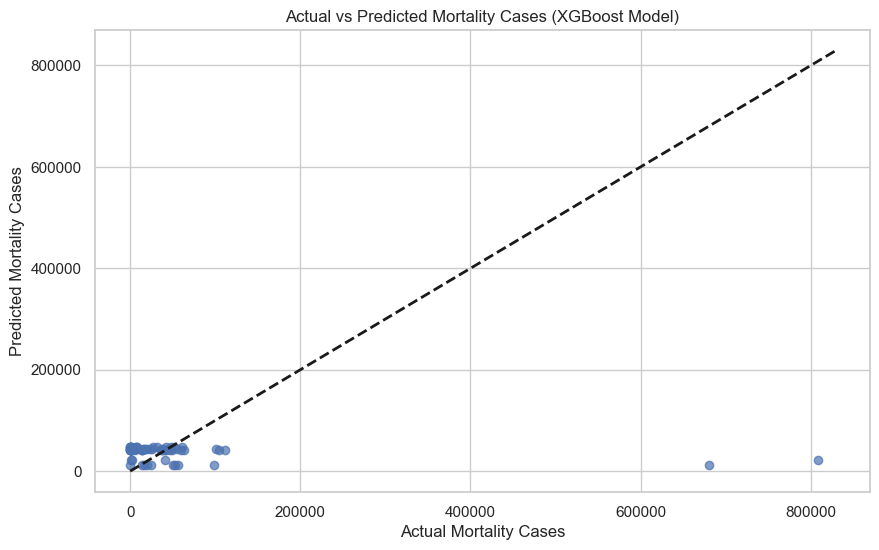

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Load the dataset
data = pd.read_csv('Estimated Mortality of Cancer Cases in India.csv')

# Display the first few rows of the dataset
print(data.head())

# Print the column names to understand the structure
print(data.columns)

# Strip whitespace from column names and convert to lowercase
data.columns = data.columns.str.strip().str.lower()

# Check the updated column names
print(data.columns)

# Drop any unnamed columns (usually extra columns)
data = data.loc[:, ~data.columns.str.contains('^unnamed')]

# Melt the DataFrame to have a long format for easier plotting
# Adjust 'state/ut' to the correct column name if necessary
data_melted = data.melt(id_vars=['state/ut'], var_name='year', value_name='mortality_cases')

# Convert 'year' and 'mortality_cases' to numeric
data_melted['year'] = pd.to_numeric(data_melted['year'], errors='coerce')
data_melted['mortality_cases'] = pd.to_numeric(data_melted['mortality_cases'], errors='coerce')

# Drop rows with NaN values
data_melted.dropna(inplace=True)

# Define features and target variable
X = data_melted[['year']]  # Using 'year' as the feature
y = data_melted['mortality_cases']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Model - MSE: {mse:.2f}, R²: {r2:.2f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Mortality Cases')
plt.ylabel('Predicted Mortality Cases')
plt.title('Actual vs Predicted Mortality Cases (XGBoost Model)')
plt.show()